In [1]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
import pickle
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [46]:
# import dataset

path = './Data/data_v2.csv'
dataset = pd.read_csv(path)
df = dataset.copy()

In [47]:
df = df.drop('id', axis=1)

In [48]:
df.head()

,area,sex,age,antiquity,salary,state,chapter,seniority
0,CUSTOMER SUCCESS,FEMENINO,27.0,9.0,4000000,active,EXPERIENCIA_USUARIO,ADVANCED
1,CUSTOMER SUCCESS,FEMENINO,43.0,57.0,33000000,active,HEAD,MASTER
2,CUSTOMER SUCCESS,MASCULINO,24.0,0.0,2050000,retired,BACKEND,TRAINEE
3,CUSTOMER SUCCESS,MASCULINO,25.0,21.0,5500000,active,BACKEND,ADVANCED
4,CUSTOMER SUCCESS,FEMENINO,31.0,93.0,3406000,active,CALIDAD DE SOFTWARE,ADVANCED


In [49]:
df  =df.drop(['area', 'chapter'], axis=1)
df.head()

,sex,age,antiquity,salary,state,seniority
0,FEMENINO,27.0,9.0,4000000,active,ADVANCED
1,FEMENINO,43.0,57.0,33000000,active,MASTER
2,MASCULINO,24.0,0.0,2050000,retired,TRAINEE
3,MASCULINO,25.0,21.0,5500000,active,ADVANCED
4,FEMENINO,31.0,93.0,3406000,active,ADVANCED


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1329 non-null   object 
 1   age        1329 non-null   float64
 2   antiquity  1329 non-null   float64
 3   salary     1329 non-null   int64  
 4   state      1329 non-null   object 
 5   seniority  1329 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 62.4+ KB


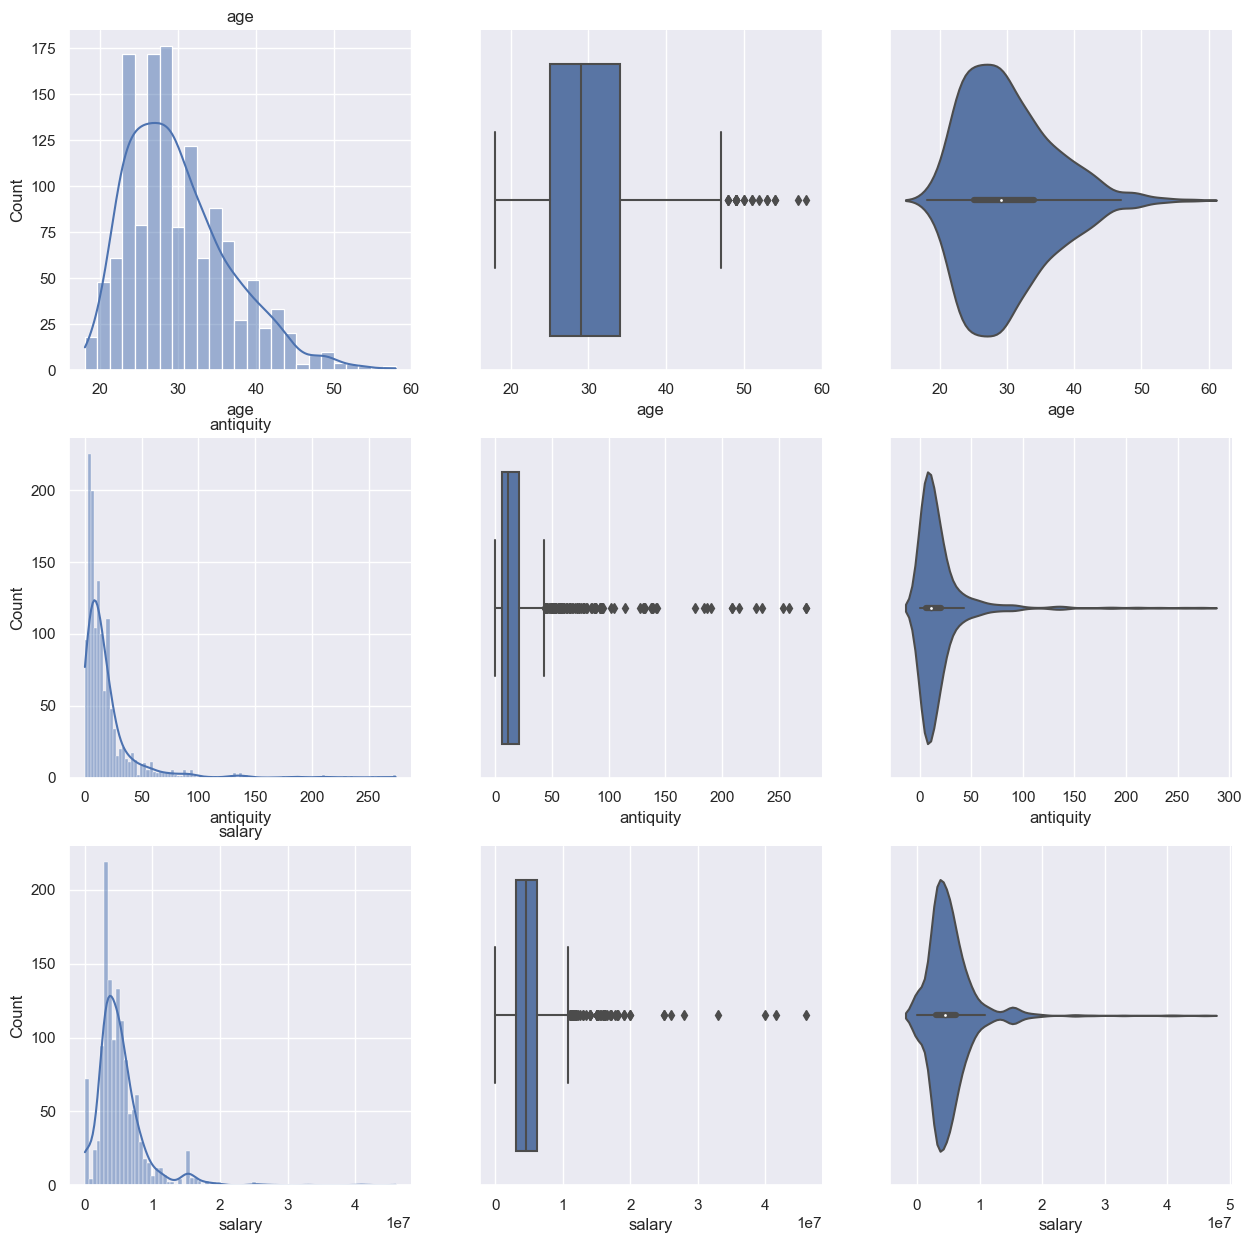

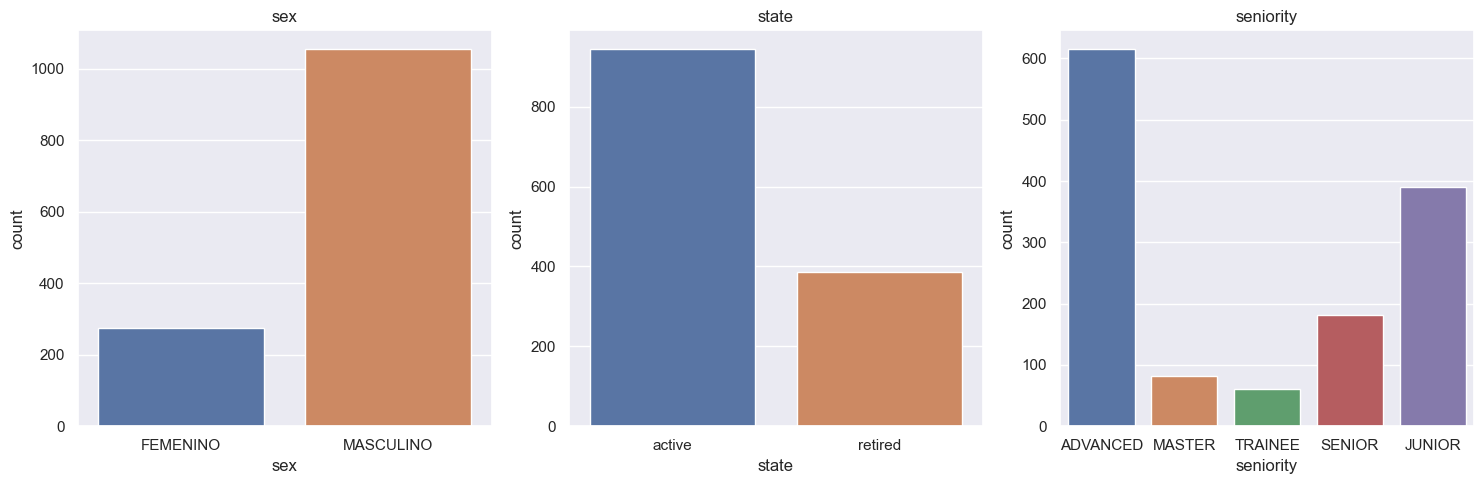

In [36]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

fig, axs = plt.subplots(ncols=3, nrows=len(num_cols), figsize=(15, len(num_cols)*5))

for i, col in enumerate(num_cols):
    sns.histplot(x=num_cols[i], data=df, kde=True, ax=axs[i][0])
    sns.boxplot(x=num_cols[i], data=df, ax=axs[i][1])
    sns.violinplot(x=num_cols[i], data=df, ax=axs[i][2])
    axs[i][0].set_title(num_cols[i])
    axs[i][1].set_title('')
    axs[i][2].set_title('')
    
sns.set_palette("Set2")
sns.set_style("whitegrid")
sns.despine()

sns.set(rc={'figure.figsize':(15, 5)})
fig, axs = plt.subplots(ncols=len(cat_cols), nrows=1)

for i, col in enumerate(cat_cols):
    sns.countplot(x=cat_cols[i], data=df, ax=axs[i])
    axs[i].set_title(cat_cols[i])

plt.tight_layout()
plt.show()

In [50]:
scaler = StandardScaler()

In [51]:
df[['age', 'antiquity', 'salary']] = scaler.fit_transform(df[['age', 'antiquity', 'salary']])

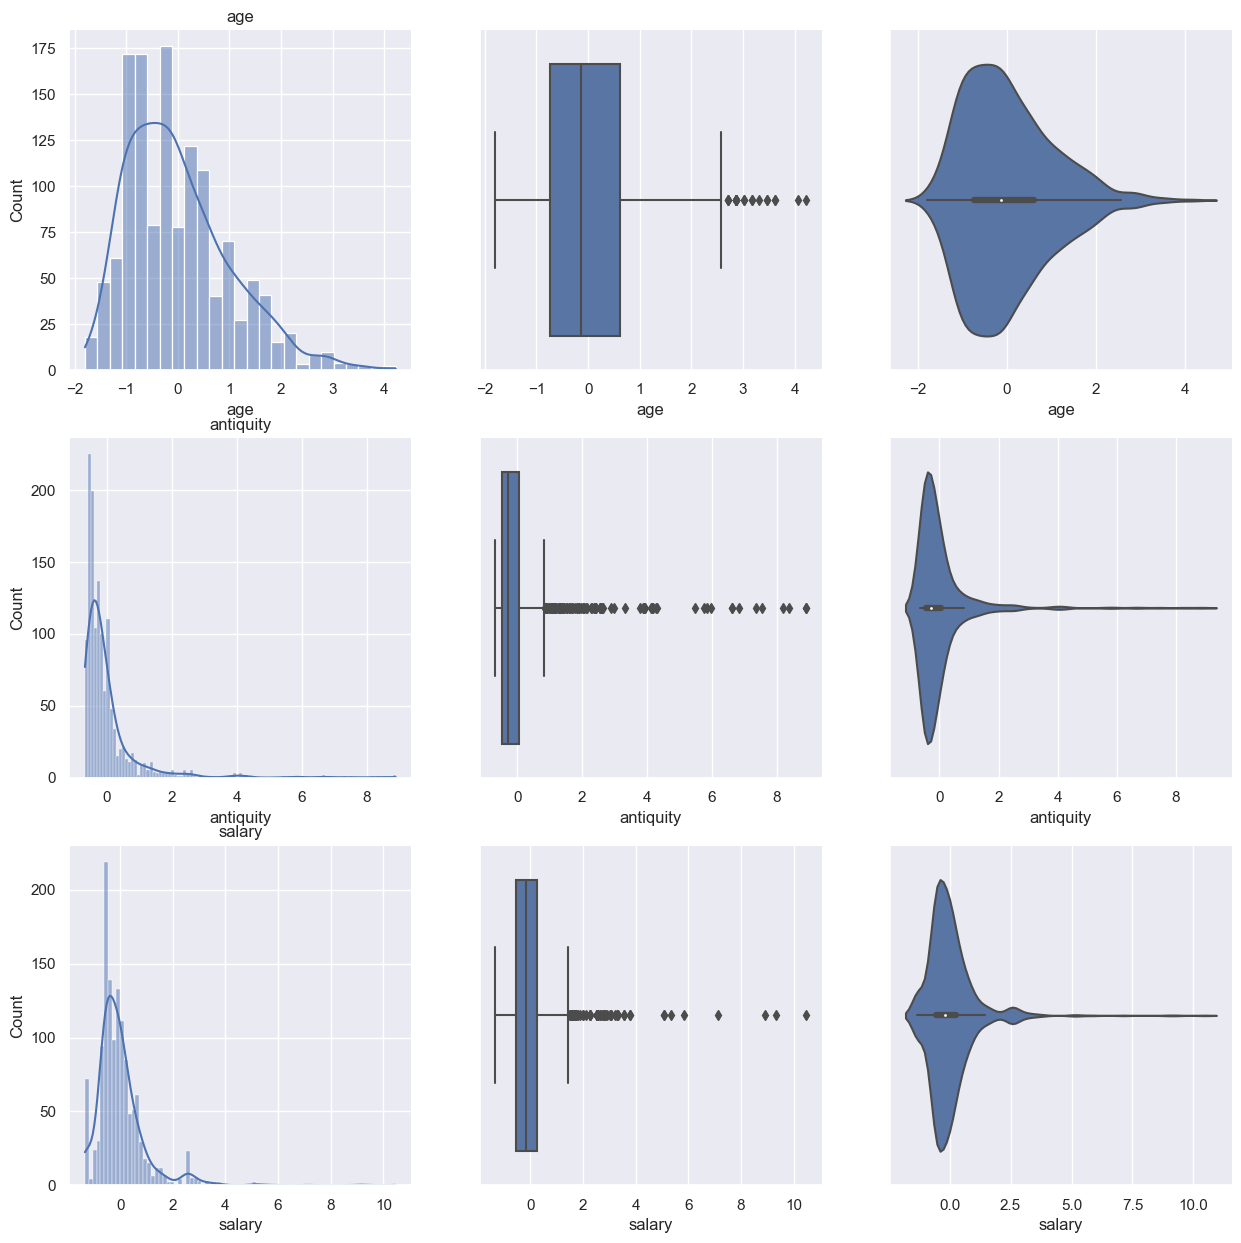

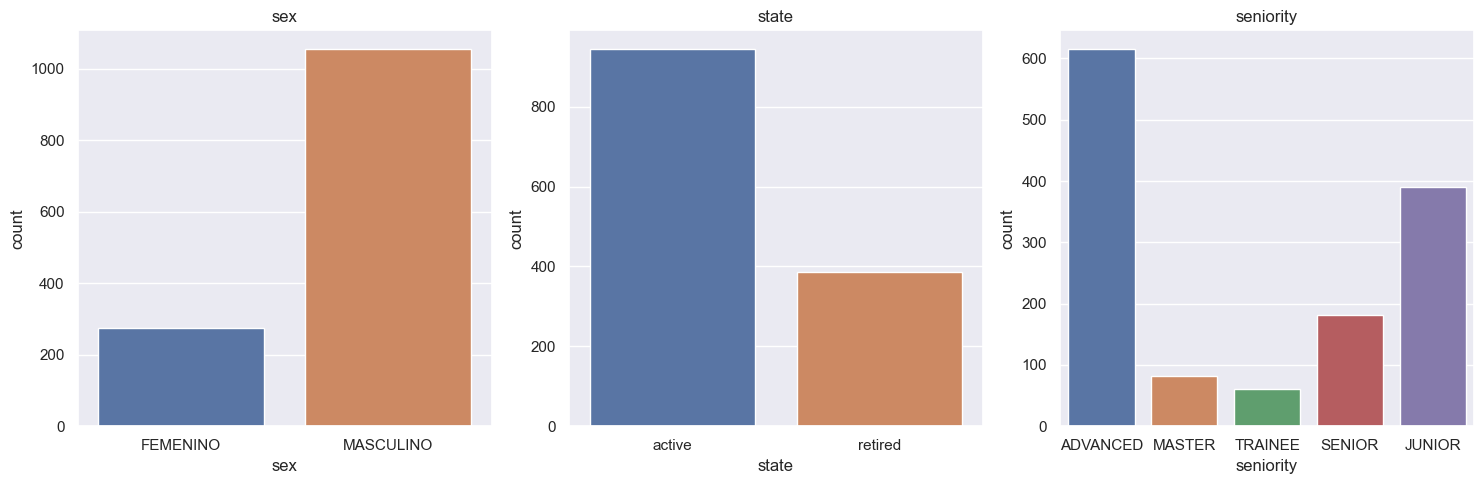

In [40]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

fig, axs = plt.subplots(ncols=3, nrows=len(num_cols), figsize=(15, len(num_cols)*5))

for i, col in enumerate(num_cols):
    sns.histplot(x=num_cols[i], data=df, kde=True, ax=axs[i][0])
    sns.boxplot(x=num_cols[i], data=df, ax=axs[i][1])
    sns.violinplot(x=num_cols[i], data=df, ax=axs[i][2])
    axs[i][0].set_title(num_cols[i])
    axs[i][1].set_title('')
    axs[i][2].set_title('')
    
sns.set_palette("Set2")
sns.set_style("whitegrid")
sns.despine()

sns.set(rc={'figure.figsize':(15, 5)})
fig, axs = plt.subplots(ncols=len(cat_cols), nrows=1)

for i, col in enumerate(cat_cols):
    sns.countplot(x=cat_cols[i], data=df, ax=axs[i])
    axs[i].set_title(cat_cols[i])

plt.tight_layout()
plt.show()

In [55]:
df

,sex,age,antiquity,salary,state,seniority
0,FEMENINO,-0.445111,-0.361086,-0.312392,active,ADVANCED
1,FEMENINO,1.962790,1.314875,7.131050,active,MASTER
2,MASCULINO,-0.896593,-0.675329,-0.812899,retired,TRAINEE
3,MASCULINO,-0.746099,0.057904,0.072614,active,ADVANCED
4,FEMENINO,0.156864,2.571846,-0.464854,active,ADVANCED
...,...,...,...,...,...,...
1324,MASCULINO,-1.197581,-0.605497,-0.438673,active,ADVANCED
1325,FEMENINO,-0.595605,1.279959,0.508954,active,SENIOR
1326,MASCULINO,2.715260,0.546726,-0.515675,active,ADVANCED
1327,MASCULINO,-0.595605,-0.570581,0.072614,active,ADVANCED


In [53]:
Y = df['state'].map({'active':0, 'retired':1})

In [56]:
X = df[['sex', 'age', 'antiquity', 'salary', 'seniority']]

In [57]:
X = pd.get_dummies(X, columns=['sex', 'seniority'], drop_first=True)

In [58]:
X

,age,antiquity,salary,sex_MASCULINO,seniority_JUNIOR,seniority_MASTER,seniority_SENIOR,seniority_TRAINEE
0,-0.445111,-0.361086,-0.312392,0,0,0,0,0
1,1.962790,1.314875,7.131050,0,0,1,0,0
2,-0.896593,-0.675329,-0.812899,1,0,0,0,1
3,-0.746099,0.057904,0.072614,1,0,0,0,0
4,0.156864,2.571846,-0.464854,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1324,-1.197581,-0.605497,-0.438673,1,0,0,0,0
1325,-0.595605,1.279959,0.508954,0,0,0,1,0
1326,2.715260,0.546726,-0.515675,1,0,0,0,0
1327,-0.595605,-0.570581,0.072614,1,0,0,0,0


Modelo

In [59]:
model = sm.Logit(Y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.558803
         Iterations 6


In [60]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:                 1329
Model:                          Logit   Df Residuals:                     1320
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                 0.07156
Time:                        18:15:17   Log-Likelihood:                -742.65
converged:                       True   LL-Null:                       -799.89
Covariance Type:            nonrobust   LLR p-value:                 4.548e-21
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2036      0.163     -7.364      0.000      -1.524      -0.883
age                   0.1356      0.075      1.809      0.071      -0.011       0.283
antiquity            -0.

In [61]:
X = X.drop(['antiquity'], axis=1)

In [62]:
model = sm.Logit(Y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.559275
         Iterations 6


In [63]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:                 1329
Model:                          Logit   Df Residuals:                     1321
Method:                           MLE   Df Model:                            7
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                 0.07078
Time:                        18:17:13   Log-Likelihood:                -743.28
converged:                       True   LL-Null:                       -799.89
Covariance Type:            nonrobust   LLR p-value:                 1.959e-21
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2075      0.164     -7.386      0.000      -1.528      -0.887
age                   0.1331      0.075      1.774      0.076      -0.014       0.280
salary               -0.